+ need to add possible features that appear to have an effect on demographic
# less social factors for now
* Focus on NE us and look at 10 yr span
* maybe work with NE data 2019 again but look at different pollutants
* work with 3 year data for now of counties
* get all dataframes
# Importing libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('display.max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

# Load data and constants

In [27]:
MA, CT, ME, NY, NH, NJ, PA, VT, DE, MD  = [25, 9, 23, 36, 33, 34, 42, 50, 10 , 24]
NORTH_EAST = [MA, CT, ME, NY, NH, NJ, PA, VT, DE, MD]
RI, FL,GA, NC, SC = [44, 12, 13, 37, 45] # midatlantic
AL, KY, MS, TN, WV = [1, 21, 29, 47, 45] # south east
IL, IN, IA, KS, MI,MN = [17, 18, 19, 20, 26, 27] # mid_west


daily_aqi_by_county_2017 = pd.read_csv('../../data/raw/daily_aqi_by_county_2017.csv')
daily_aqi_by_county_2018 = pd.read_csv('../../data/raw/daily_aqi_by_county_2018.csv')
daily_aqi_by_county_2019 = pd.read_csv('../../data/raw/daily_aqi_by_county_2019.csv')

county_demographic = pd.read_csv('../../data/raw/county_cc-est2019-alldata.csv', encoding='latin-1')

unemployment = pd.read_excel('../../data/raw/Unemployment.xls', header=None, sheet_name=0)

# Small area income and poverty estimates
saipe2017 = pd.read_excel('../../data/raw/saipe_economic/est17all.xls')
saipe2018 = pd.read_excel('../../data/raw/saipe_economic/est18all.xls')
saipe2019 = pd.read_excel('../../data/raw/saipe_economic/est19all.xls')

educ_vehicle_2017 = pd.read_csv('../../data/processed/acs1_edu_vehicle2017.csv')
educ_vehicle_2018 = pd.read_csv('../../data/processed/acs1_edu_vehicle2018.csv')
educ_vehicle_2019 = pd.read_csv('../../data/processed/acs1_edu_vehicle2019.csv')

annual_income_by_county = pd.read_csv('../../data/raw/CAINC1__ALL_AREAS_1969_2019.csv', encoding='latin-1')


In [28]:
def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df

# Clean up Unemployment Data


In [29]:
display(unemployment)
unemployment2017_2019 = unemployment[4:]
unemployment2017_2019.reset_index(drop=True, inplace=True)
unemployment_header = unemployment2017_2019.iloc[0, :].values
unemployment2017_2019.columns = unemployment_header
unemployment2017_2019 = unemployment2017_2019.drop([0])
display(unemployment2017_2019)

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,Unemployment and median household income for t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sources: Unemployment: U.S. Department of Labo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fips_txt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,72145,PR,"Vega Baja Municipio, PR",1,1,1,19805,17607,2198,11.1,...,13117,11750,1367,10.4,13037,11791,1246,9.6,NaN,NaN
3276,72147,PR,"Vieques Municipio, PR",7,12,0,2441,2120,321,13.2,...,2718,2269,449,16.5,2585,2406,179,6.9,NaN,NaN
3277,72149,PR,"Villalba Municipio, PR",2,2,1,7636,6648,988,12.9,...,7311,6154,1157,15.8,7406,6231,1175,15.9,NaN,NaN
3278,72151,PR,"Yabucoa Municipio, PR",1,1,1,10613,9005,1608,15.2,...,8762,7509,1253,14.3,8691,7552,1139,13.1,NaN,NaN


,fips_txt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
1,00000,US,United States,NaN,NaN,NaN,142601667,136904680,5696987,3.99504,...,161389026,155102319,6286707,3.89537,163100055,157115247,5984808,3.66941,65712,NaN
2,01000,AL,Alabama,NaN,NaN,NaN,2133223,2035594,97629,4.6,...,2216627,2130845,85782,3.9,2241747,2174483,67264,3,51771,100
3,01001,AL,"Autauga County, AL",2,2,1,21720,20846,874,4,...,26196,25261,935,3.6,26172,25458,714,2.7,58233,112.482
4,01003,AL,"Baldwin County, AL",3,2,1,69533,66971,2562,3.7,...,95233,91809,3424,3.6,97328,94675,2653,2.7,59871,115.646
5,01005,AL,"Barbour County, AL",6,6,0,11373,10748,625,5.5,...,8414,7987,427,5.1,8537,8213,324,3.8,35972,69.4829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,72145,PR,"Vega Baja Municipio, PR",1,1,1,19805,17607,2198,11.1,...,13117,11750,1367,10.4,13037,11791,1246,9.6,NaN,NaN
3272,72147,PR,"Vieques Municipio, PR",7,12,0,2441,2120,321,13.2,...,2718,2269,449,16.5,2585,2406,179,6.9,NaN,NaN
3273,72149,PR,"Villalba Municipio, PR",2,2,1,7636,6648,988,12.9,...,7311,6154,1157,15.8,7406,6231,1175,15.9,NaN,NaN
3274,72151,PR,"Yabucoa Municipio, PR",1,1,1,10613,9005,1608,15.2,...,8762,7509,1253,14.3,8691,7552,1139,13.1,NaN,NaN


* fix header columns of csv file
* remove empty rows

In [30]:
# used to remove other year data to keep only 2017-2019
display(unemployment2017_2019.columns)
cols_to_remove = unemployment2017_2019.iloc[:, 3:74].columns
unemployment2017_2019 = remove_col(unemployment2017_2019, cols_to_remove)

unemployment_rates_2017_2019 = unemployment2017_2019.iloc[:, [1,2,6, 10, 14]]
display(unemployment_rates_2017_2019)

Index(['fips_txt', 'Stabr', 'area_name', 'Rural_urban_continuum_code_2013',
       'Urban_influence_code_2013', 'Metro_2013', 'Civilian_labor_force_2000',
       'Employed_2000', 'Unemployed_2000', 'Unemployment_rate_2000',
       'Civilian_labor_force_2001', 'Employed_2001', 'Unemployed_2001',
       'Unemployment_rate_2001', 'Civilian_labor_force_2002', 'Employed_2002',
       'Unemployed_2002', 'Unemployment_rate_2002',
       'Civilian_labor_force_2003', 'Employed_2003', 'Unemployed_2003',
       'Unemployment_rate_2003', 'Civilian_labor_force_2004', 'Employed_2004',
       'Unemployed_2004', 'Unemployment_rate_2004',
       'Civilian_labor_force_2005', 'Employed_2005', 'Unemployed_2005',
       'Unemployment_rate_2005', 'Civilian_labor_force_2006', 'Employed_2006',
       'Unemployed_2006', 'Unemployment_rate_2006',
       'Civilian_labor_force_2007', 'Employed_2007', 'Unemployed_2007',
       'Unemployment_rate_2007', 'Civilian_labor_force_2008', 'Employed_2008',
       'Unemploy

,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
1,US,United States,4.35512,3.89537,3.66941
2,AL,Alabama,4.4,3.9,3
3,AL,"Autauga County, AL",3.9,3.6,2.7
4,AL,"Baldwin County, AL",4.1,3.6,2.7
5,AL,"Barbour County, AL",5.8,5.1,3.8
...,...,...,...,...,...
3271,PR,"Vega Baja Municipio, PR",12.4,10.4,9.6
3272,PR,"Vieques Municipio, PR",14.5,16.5,6.9
3273,PR,"Villalba Municipio, PR",19.4,15.8,15.9
3274,PR,"Yabucoa Municipio, PR",16.5,14.3,13.1


* remove all other column data for years 2000 - 2016
* make a df for only unemployment rates

In [48]:
# Retain only counties and not regions / individual state

UE_counties = unemployment_rates_2017_2019['area_name'].str.contains(',')
UE_county_rate = unemployment_rates_2017_2019.loc[UE_counties]

In [66]:
# check for missing values and dupes

display(UE_county_rate.isnull().sum())
display(UE_county_rate.loc[UE_county_rate.isnull().any(axis=1)])

daily_aqi_by_county_2018.loc[daily_aqi_by_county_2018['State Name'].str.contains('Alaska') & daily_aqi_by_county_2018['county Name'].str.contains('Prince')]
daily_aqi_by_county_2018.loc[daily_aqi_by_county_2018['State Name'].str.contains('Alaska') & daily_aqi_by_county_2018['county Name'].str.contains('Skagway')]
daily_aqi_by_county_2018.loc[daily_aqi_by_county_2018['State Name'].str.contains('Alaska') & daily_aqi_by_county_2018['county Name'].str.contains('Wrangell')]

UE_county_rate.dropna(inplace=True)

Stabr                     0
area_name                 0
Unemployment_rate_2017    3
Unemployment_rate_2018    3
Unemployment_rate_2019    3
dtype: int64

,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
93,AK,"Prince of Wales-Outer Ketchikan Census Area, AK",NaN,NaN,NaN
96,AK,"Skagway-Hoonah-Angoon Census Area, AK",NaN,NaN,NaN
100,AK,"Wrangell-Petersburg Census Area, AK",NaN,NaN,NaN


<ipython-input-66-aa30b2830535>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UE_county_rate.dropna(inplace=True)


Stabr                     0
area_name                 0
Unemployment_rate_2017    0
Unemployment_rate_2018    0
Unemployment_rate_2019    0
dtype: int64

* 3 alaskan counties show unknown values;
* These values will not be mergeable with aqi data as it we do not aqi data on those areas
* drop these rows


In [76]:
# check if have any duplicate value
UE_county_rate['area_name'].duplicated().sum()

3167

* we have 0 duplicates


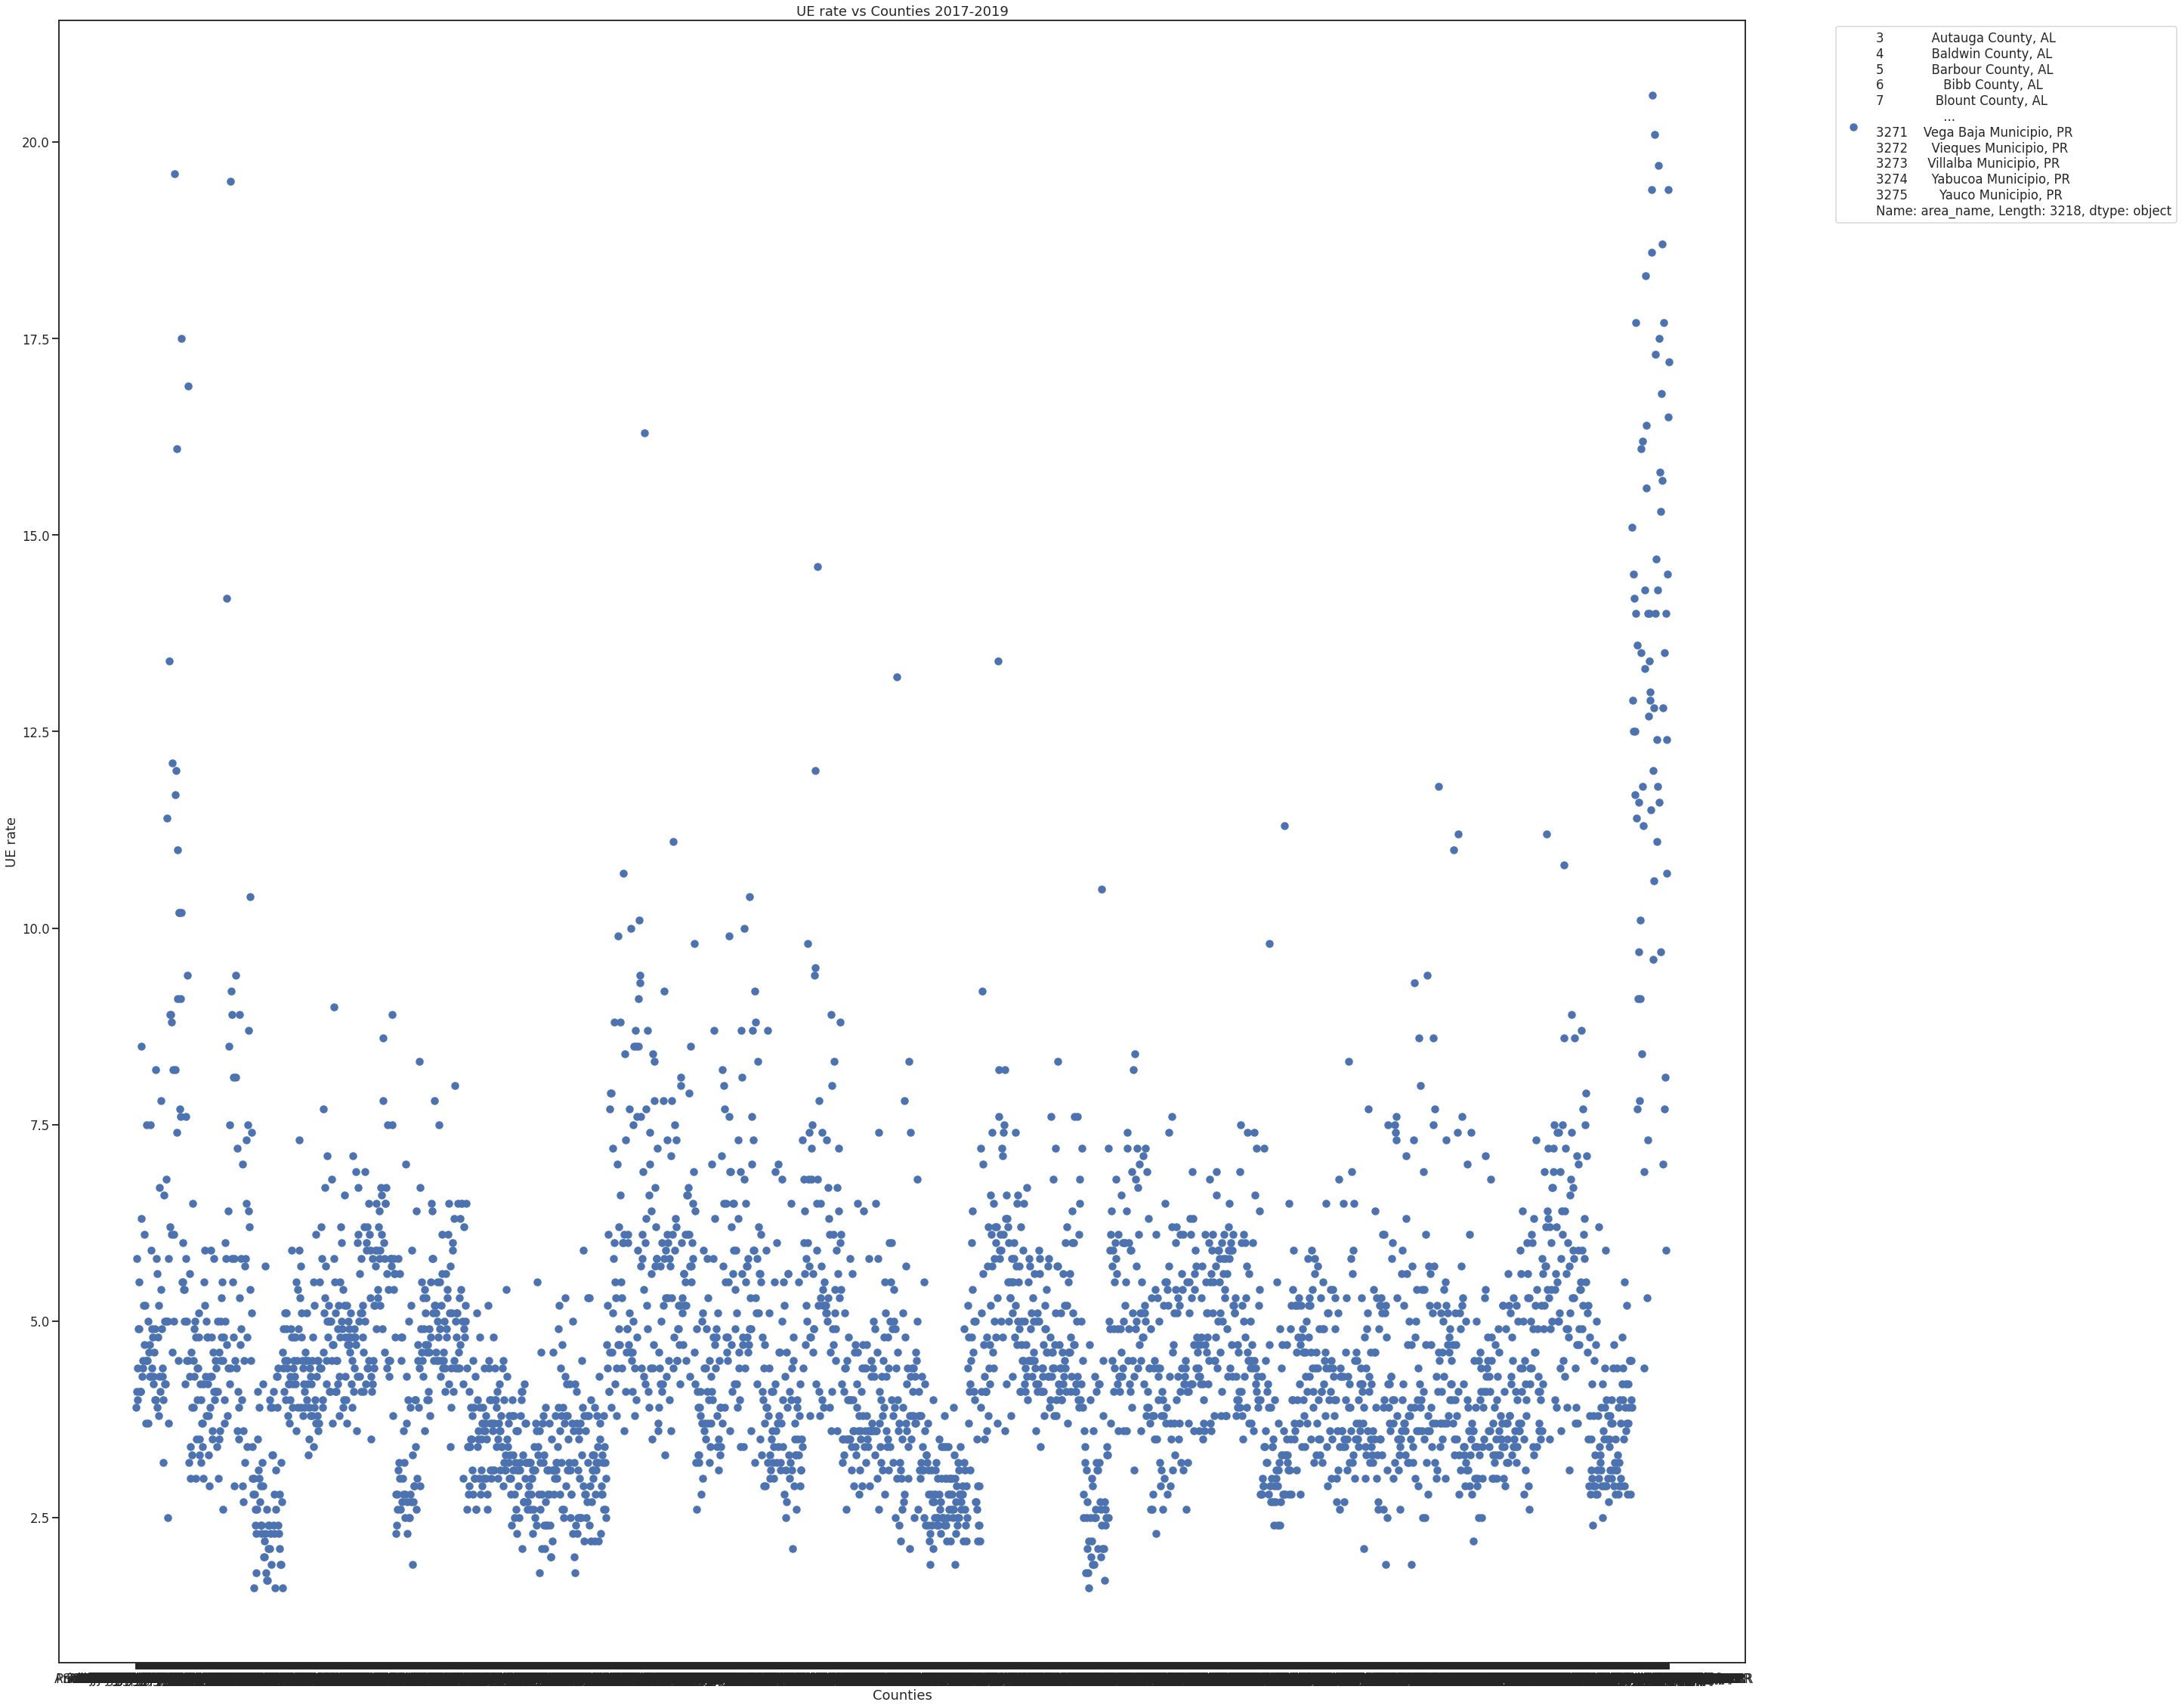

In [77]:
# now to explore unemployment rate df
UE_county_rate
fig, ax = plt.subplots(figsize=(40,40))

plt.title('UE rate vs Counties 2017-2019')
plt.xlabel('Counties')
plt.ylabel('UE rate')
ax.scatter(UE_county_rate['area_name'], UE_county_rate['Unemployment_rate_2017'], label=UE_county_rate['area_name'])

ax.legend(bbox_to_anchor=(1.05,1))
plt.show()


In [ ]:
#order then plot top 100 and bottom 100

In [32]:
# clean up saipe data 2017

saipe_header = saipe2017.iloc[2, :].values
saipe_header
saipe2017.columns = saipe_header
saipe2017.drop([0,1,2], inplace=True)
saipe2017.reset_index(drop=True, inplace=True)
saipe2017

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
0,00,000,US,United States,42583651,42342619,42824683,13.4,13.3,13.5,...,17.5,60336,60250,60422,3932969,3880645,3985293,20.2,19.9,20.5
1,01,000,AL,Alabama,802263,784517,820009,16.9,16.5,17.3,...,23.8,48193,47451,48935,78986,75009,82963,27.7,26.3,29.1
2,01,001,AL,Autauga County,7390,6147,8633,13.4,11.1,15.7,...,22.1,58343,52121,64565,.,.,.,.,.,.
3,01,003,AL,Baldwin County,21199,17444,24954,10.1,8.3,11.9,...,17.9,56607,52439,60775,.,.,.,.,.,.
4,01,005,AL,Barbour County,7414,6325,8503,33.4,28.5,38.3,...,55,32490,29218,35762,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,037,WY,Sweetwater County,4253,3540,4966,10,8.3,11.7,...,14,75590,69190,81990,.,.,.,.,.,.
3190,56,039,WY,Teton County,1348,1021,1675,5.8,4.4,7.2,...,7.9,90145,80434,99856,.,.,.,.,.,.
3191,56,041,WY,Uinta County,2067,1623,2511,10.2,8,12.4,...,13.4,67404,60925,73883,.,.,.,.,.,.
3192,56,043,WY,Washakie County,845,632,1058,10.7,8,13.4,...,17.3,57989,53142,62836,.,.,.,.,.,.


In [33]:
# clean up saipe data 2018

saipe_header = saipe2018.iloc[2, :].values
saipe_header
saipe2018.columns = saipe_header
saipe2018.drop([0,1,2], inplace=True)
saipe2018.reset_index(drop=True, inplace=True)
saipe2018


,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
0,00,000,US,United States,41852315,41619366,42085264,13.1,13,13.2,...,17.2,61937,61843,62031,3758704,3714862,3802546,19.5,19.3,19.7
1,01,000,AL,Alabama,801758,785668,817848,16.8,16.5,17.1,...,23.7,49881,49123,50639,73915,69990,77840,26,24.6,27.4
2,01,001,AL,Autauga County,7587,6334,8840,13.8,11.5,16.1,...,23.9,59338,53628,65048,.,.,.,.,.,.
3,01,003,AL,Baldwin County,21069,17390,24748,9.8,8.1,11.5,...,16.9,57588,54437,60739,.,.,.,.,.,.
4,01,005,AL,Barbour County,6788,5662,7914,30.9,25.8,36,...,45.9,34382,31157,37607,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,037,WY,Sweetwater County,3540,2804,4276,8.4,6.7,10.1,...,11.2,73315,67141,79489,.,.,.,.,.,.
3190,56,039,WY,Teton County,1443,1137,1749,6.3,5,7.6,...,7.7,99087,88142,110032,.,.,.,.,.,.
3191,56,041,WY,Uinta County,2010,1585,2435,10,7.9,12.1,...,14,63401,56812,69990,.,.,.,.,.,.
3192,56,043,WY,Washakie County,918,700,1136,11.9,9.1,14.7,...,19.3,55190,49263,61117,.,.,.,.,.,.


In [34]:
# clean up saipe data 2019

saipe_header = saipe2019.iloc[2, :].values
saipe_header
saipe2019.columns = saipe_header
saipe2019.drop([0,1,2], inplace=True)
saipe2019.reset_index(drop=True, inplace=True)
saipe2019


,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
0,00,000,US,United States,39490096,39248096,39732096,12.3,12.2,12.4,...,16,65712,65594,65830,3457689,3405854,3509524,18.2,17.9,18.5
1,01,000,AL,Alabama,747478,730491,764465,15.6,15.2,16,...,21.6,51771,51179,52363,69236,65296,73176,24.2,22.8,25.6
2,01,001,AL,Autauga County,6723,5517,7929,12.1,9.9,14.3,...,19.4,58233,52517,63949,.,.,.,.,.,.
3,01,003,AL,Baldwin County,22360,18541,26179,10.1,8.4,11.8,...,17.2,59871,54593,65149,.,.,.,.,.,.
4,01,005,AL,Barbour County,5909,4787,7031,27.1,22,32.2,...,49,35972,31822,40122,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,037,WY,Sweetwater County,3453,2743,4163,8.3,6.6,10,...,11.1,80639,73437,87841,.,.,.,.,.,.
3190,56,039,WY,Teton County,1396,1073,1719,6,4.6,7.4,...,6.7,98837,86531,111143,.,.,.,.,.,.
3191,56,041,WY,Uinta County,1699,1264,2134,8.5,6.3,10.7,...,11.1,70756,63191,78321,.,.,.,.,.,.
3192,56,043,WY,Washakie County,845,626,1064,11.1,8.2,14,...,17.4,55122,50050,60194,.,.,.,.,.,.


In [35]:
annual_aqi_by_county_2019 = pd.read_csv('../../data/raw/annual_aqi_by_county_2019.csv')

In [36]:
print(daily_aqi_by_county_2019.columns)

print(annual_aqi_by_county_2019.columns)
annual_aqi_by_county_2019.head()
# annual_aqi_by_county_2019.shape
annual_aqi_by_county_2019['Days with AQI'].min()

print(annual_aqi_by_county_2019.isna().sum())
annual_aqi_by_county_2019.head()
annual_aqi_by_county_2019.shape
len(annual_aqi_by_county_2019.County)

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10'],
      dtype='object')
State                                  0
County                                 0
Year                                   0
Days with AQI                          0
Good Days                              0
Moderate Days                          0
Unhealthy for Sensitive Groups Days    0
Unhealthy Days                         0
Very Unhealthy Days                    0
Hazardous Days                         0
Max AQI                                

1053

In [37]:
PR = annual_aqi_by_county_2019.State == 'Puerto Rico'
annual_aqi_by_county_2019.loc[PR]

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
792,Puerto Rico,Adjuntas,2019,117,108,9,0,0,0,0,66,44,18,0,0,0,0,117,0
793,Puerto Rico,Bayamon,2019,305,288,17,0,0,0,0,95,42,17,11,0,114,49,131,0
794,Puerto Rico,Caguas,2019,354,334,16,4,0,0,0,114,35,10,119,121,0,0,114,0
795,Puerto Rico,Catano,2019,348,231,106,10,1,0,0,159,88,33,0,0,69,3,223,53
796,Puerto Rico,Fajardo,2019,119,104,15,0,0,0,0,84,52,22,0,0,0,0,116,3
797,Puerto Rico,Guayama,2019,224,220,4,0,0,0,0,96,12,0,0,0,0,196,28,0
798,Puerto Rico,Guaynabo,2019,362,325,33,4,0,0,0,110,51,20,23,235,0,0,89,15
799,Puerto Rico,Mayagnez,2019,202,159,43,0,0,0,0,85,58,25,0,0,7,0,195,0
800,Puerto Rico,Ponce,2019,351,247,98,6,0,0,0,136,65,35,9,0,0,0,247,95
801,Puerto Rico,San Juan,2019,277,277,0,0,0,0,0,35,17,14,277,0,0,0,0,0


In [38]:
hazard = annual_aqi_by_county_2019['Hazardous Days'] != 0

annual_aqi_by_county_2019.loc[hazard]

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
21,Alaska,Fairbanks North Star,2019,365,230,96,18,16,1,4,377,103,38,0,13,130,1,215,6
35,Arizona,Pinal,2019,365,123,209,21,2,3,7,886,100,63,0,0,168,0,36,161
64,California,Inyo,2019,365,232,121,6,2,1,3,638,84,47,0,0,319,0,14,32
65,California,Kern,2019,365,119,151,87,6,1,1,548,122,67,0,2,260,0,73,30
66,California,Kings,2019,365,152,172,37,2,0,2,507,105,56,0,0,190,0,103,72
74,California,Mono,2019,365,270,80,6,0,0,9,3852,81,27,0,0,0,0,305,60
570,New Mexico,Dona Ana,2019,365,170,171,17,3,2,2,630,87,51,0,8,263,0,23,71
575,New Mexico,Luna,2019,361,349,10,1,0,0,1,617,29,12,0,0,0,0,0,361


* seems that pm5 and pm10 are common for days where aqi is above average